1st CNN project using fashion MNIST DS


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,datasets,models


LOAD DATASET

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
classes= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [ ]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
classes[6]

'Shirt'

In [ ]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

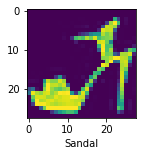

In [ ]:
plot_sample(X_train,y_train , 9)

In [ ]:
#now normalizing the pixel value from 0 to 1 range

In [ ]:
X_train[0]/255
X_test[0]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#building the ANN first to classify image
ann_models = models.Sequential([
    layers.Flatten(input_shape = (28,28,)),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')

])

In [ ]:
ann_models.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy' , metrics =['accuracy'])

In [ ]:
ann_models.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.2719 - accuracy: 0.7190
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7367 - accuracy: 0.7373
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5648 - accuracy: 0.7840
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4536 - accuracy: 0.8360
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4202 - accuracy: 0.8481
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4020 - accuracy: 0.8552
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3971 - accuracy: 0.8575
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3810 - accuracy: 0.8619
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8666
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.36

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann_models.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 2ms/step


In [ ]:
print('classification report \n :', classification_report(y_test, y_pred_classes))



classification report 
 :               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.80      0.68      0.73      1000
           3       0.85      0.86      0.85      1000
           4       0.66      0.89      0.76      1000
           5       0.97      0.93      0.95      1000
           6       0.66      0.58      0.62      1000
           7       0.93      0.94      0.93      1000
           8       0.98      0.94      0.96      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
cnn_models = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32 ,kernel_size = (3,3),activation = 'relu' ,input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),


    #dense
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')

])

In [ ]:
cnn_models.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
cnn_models.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.6508 - accuracy: 0.8007
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3298 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3069 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2810 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2533 - accuracy: 0.9053
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2418 - accuracy: 0.9093
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2320 - accuracy: 0.9130
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.21

In [ ]:
cnn_models.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8845


[0.36654165387153625, 0.8845000267028809]

In [ ]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
classes= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

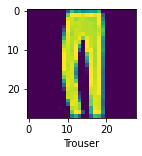

In [ ]:
plot_sample(X_test,y_test,2)

In [ ]:
y_pred = cnn_models.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.4560569e-18, 4.5533950e-17, 2.5595714e-22, 2.4022744e-16,
        3.1861772e-16, 1.8179615e-05, 2.6133404e-16, 4.4595660e-04,
        1.7036505e-15, 9.9953592e-01],
       [9.7345501e-06, 1.1441356e-11, 9.8779374e-01, 1.6444880e-11,
        2.8883917e-03, 3.0541735e-14, 9.3081081e-03, 2.2832976e-15,
        1.7904753e-08, 7.8756226e-15],
       [2.0444485e-11, 1.0000000e+00, 1.0427765e-12, 7.2167298e-12,
        2.5642983e-11, 3.1494473e-25, 9.4079834e-14, 1.6149270e-38,
        5.2855154e-23, 3.0556969e-31],
       [9.9509553e-11, 1.0000000e+00, 2.1611498e-13, 7.1309320e-10,
        4.1110535e-11, 7.0171410e-24, 2.3981654e-12, 1.0539625e-34,
        3.0505500e-23, 5.4861443e-28],
       [1.2646915e-01, 5.0258051e-11, 1.7399011e-03, 8.4207204e-05,
        3.5447720e-04, 1.6335450e-12, 8.7135220e-01, 1.3083225e-10,
        1.5594079e-09, 2.0888205e-17]], dtype=float32)

In [ ]:
#argmax funvctn will help to find the max among these ten columnms in each row


In [ ]:
y_classes = [np.argmax(elements) for elements in y_pred]
y_classes[:5]

[9, 2, 1, 1, 6]

In [ ]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

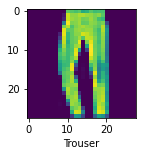

In [ ]:
plot_sample(X_test,y_test,5)

In [ ]:
classes[y_classes[5]]

'Trouser'